# Plotting Distributions with Seaborn

Seaborn is also very practical to plot data distributions. We start with simple histograms and kde. Then, we show how to plot boxplots, violinplots and bar graphs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

## Load the dataframe

In [2]:
df = pd.read_csv("data/BBBC007_analysis.csv")
df.head()

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL


## Distribution Plots

The Seaborn function for distributions is [`sns.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), whereby the histogram is the standard display type.

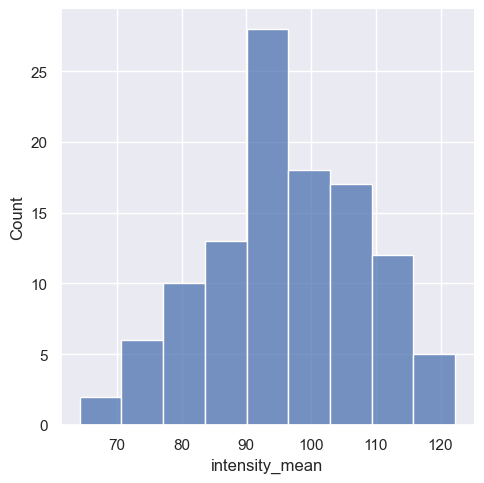

In [3]:
sns.displot(data=df,
            x="intensity_mean");

Again, we have the option to either display the distributions of the individual files in a single diagram with different colors or split them into two sub-diagrams. The choice depends on the argument to which we pass the `file_name` parameter: either `hue` for coloring within a single diagram or `col` for creating separate sub-diagrams. Let's try both.

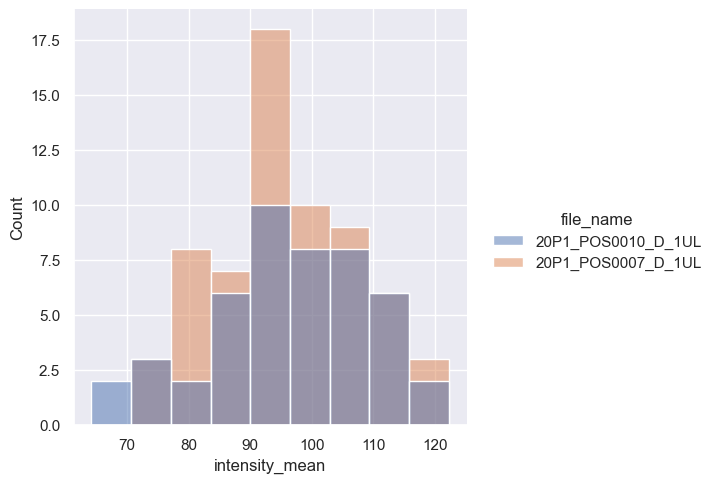

In [4]:
sns.displot(data=df,
            x="intensity_mean",
            hue="file_name");     # Display a different color for each file

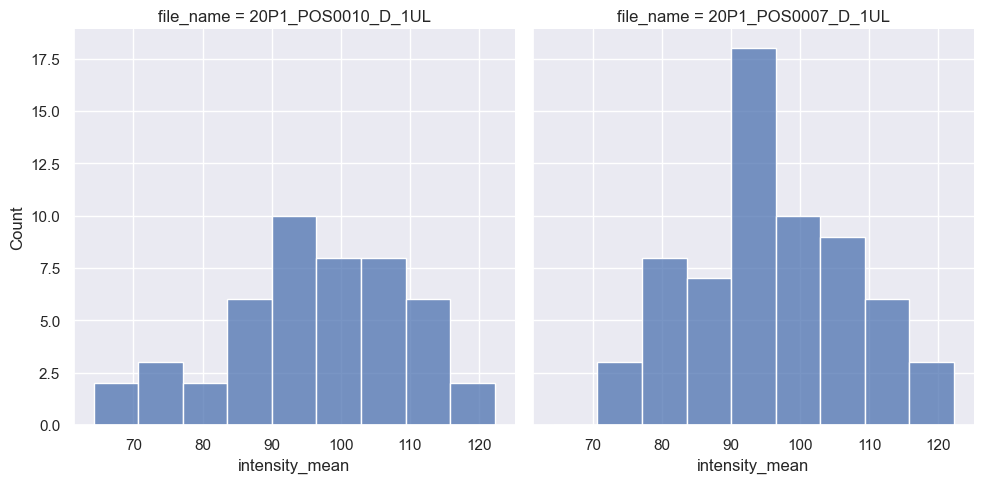

In [5]:
sns.displot(data=df,
            x="intensity_mean",
            col="file_name");       # Display a different subplot for each file

We can also add the kernel density estimation (kde) by passing `kde=True`. Just be careful while interpreting these plots (check some pitfalls [here](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation-pitfalls)).

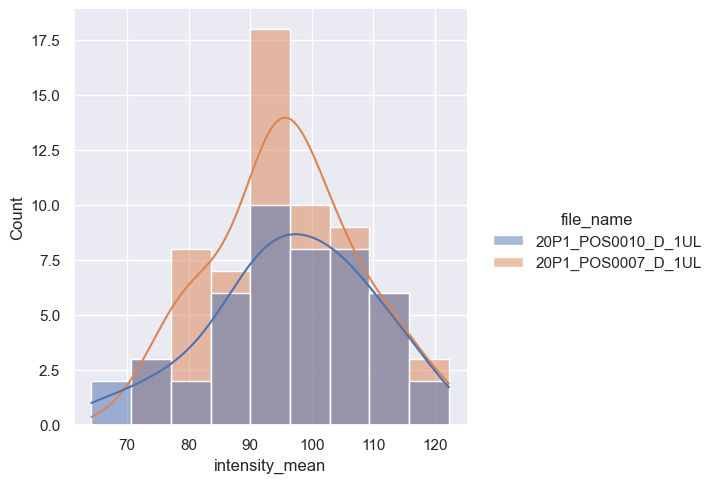

In [6]:
sns.displot(data=df,
            x="intensity_mean",
            hue="file_name",
            kde=True);

## Boxplots

Categorial variables are plotted with the function [`sns.catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot).

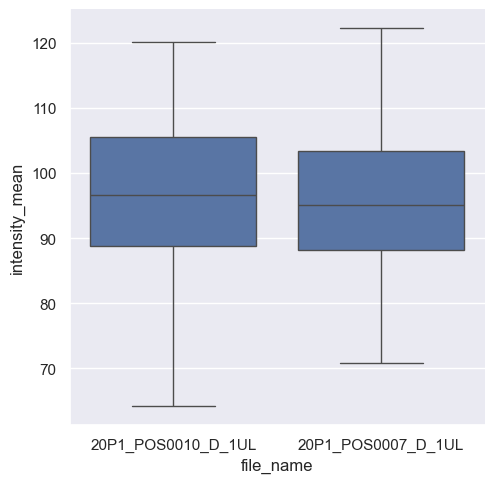

In [7]:
sns.catplot(data=df,
            x="file_name",
            y="intensity_mean",            
            kind="box");

Seaborn automatically identifies `file_name` as a categorical variable and `intensity_mean` as a numerical value. Thus, it plots boxplots for the intensity variable. If we invert x and y, we still get the same graph, but as horizontal boxplots.

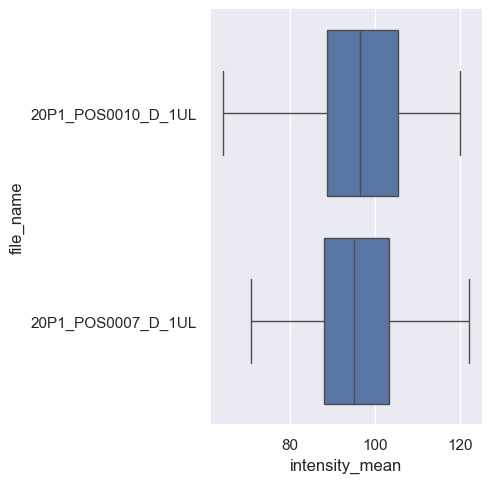

In [8]:
sns.catplot(data=df,
            x="intensity_mean",
            y="file_name",
            kind="box");

We can display advanced visualizations, such as side-by-side boxplots, which are particularly useful for comparing pairs of categorical data.

First, we need to create a second categorical variable by splitting the observations into two categories depending on the size of their areas.

In [9]:
df['area_cat'] = np.where(df['area'] > 250, 'big', 'small')
df.head()

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name,area_cat
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL,small
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL,big
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL,small
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL,small
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL,small


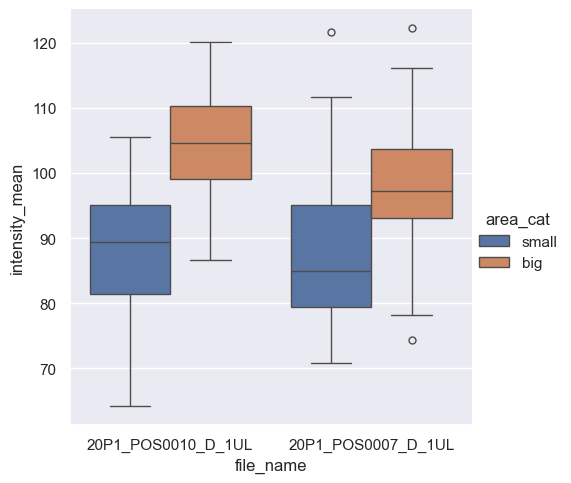

In [10]:
sns.catplot(data=df,
            x='file_name',
            y='intensity_mean',
            kind='box',
            hue='area_cat');   # Display side-by-side boxplots for each file_name and area_cat

If you only change the parameter `kind` from `box` to `violin`, we get a violin plot. By providing `split=True`, we can further customize the plot.

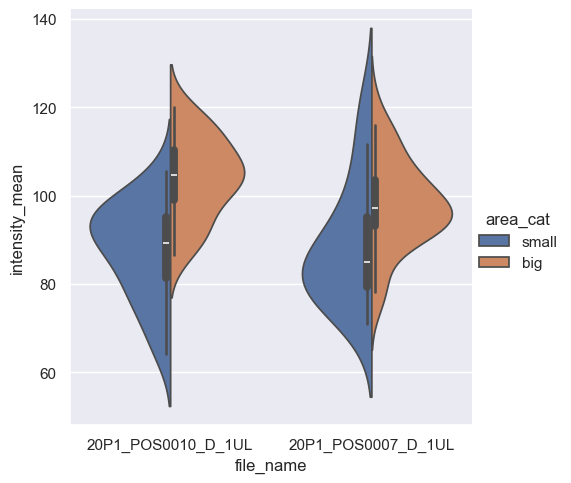

In [11]:
sns.catplot(data=df,
            x='file_name',
            y='intensity_mean',
            hue='area_cat',
            kind='violin',
            split=True);     # Display side-by-side violin plots for each file_name and area_cat

In a similar way, we get the count for categorical variables with the parameter `count`.

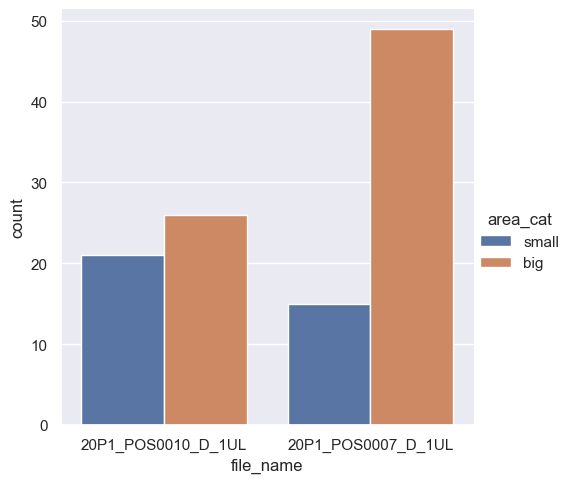

In [12]:
sns.catplot(data=df,
            x="file_name",
            hue='area_cat',
            kind="count");   # Count plot: "histogram" across a categorical, instead of quantitative, variable

---

## Exercise

You will create a figure with four subplots to visualize the empirical cumulative distribution functions (ECDFs) for the `area` variable. Each subplot will display the ECDF for different categories based on `file_name` and `area_cat`. The rows will correspond to the `file_name` and the columns to the variable `area_cat`.

*Hint: explore the function [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) in the Seaborn documentation.*

In [13]:
# Your code here
